## **Install Albumentation and Apex Package**

In [0]:
!pip install --no-cache-dir git+https://github.com/albu/albumentations > /dev/null && echo "Albumentation library is successfully installed!"


  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-xqpdcz8h
Albumentation library is successfully installed!


## **Mount Drive and Unzip data**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
%reload_ext autoreload
%autoreload 2

Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/folder'
sys.path.append(folder)
folder = "/content/gdrive/My Drive/folder/Models"
sys.path.append(folder)

## **Import required modules**

In [0]:

import torch
import train_test_loader
import show_images
from NewResnetModel import NewResnet
import train_test
import evaluate
from Albumentationtransform import AlbumentationTransforms
from GradCam import GradCAM,visualize_cam
from LR_Range_Test import LR_test

## **Abumentation Transforms**

In [0]:
import albumentations as A
import cv2
channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
train_transform = AlbumentationTransforms([                                      
                                      A.PadIfNeeded(min_height=36, min_width=36, border_mode = cv2.BORDER_REFLECT, always_apply=True,),
                                      A.RandomCrop(height=32, width=32, always_apply=True),
                                      A.HorizontalFlip(p = 0.7),
                                      A.Normalize(mean=channel_means, std=channel_stdevs),
                                      A.Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=0.7) 
                                       ])
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])


## **Load Train Test Data**

In [0]:
classes, trainloader, testloader = train_test_loader.load(train_transform,test_transform,batch_size=512)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## **Some training data**

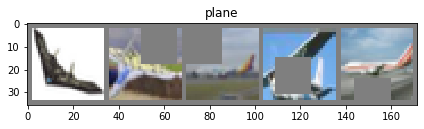

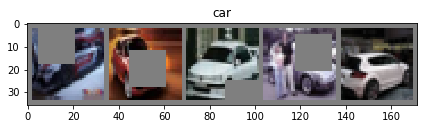

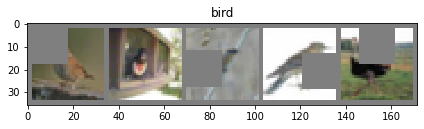

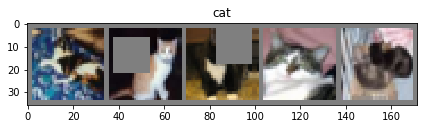

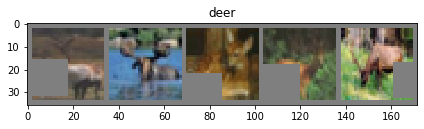

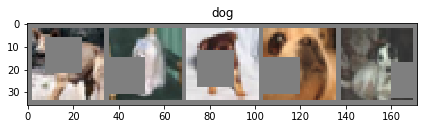

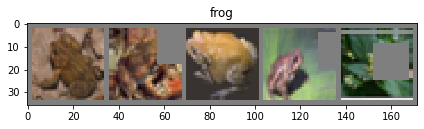

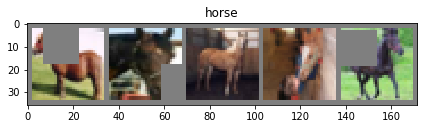

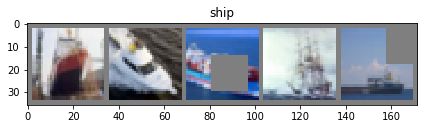

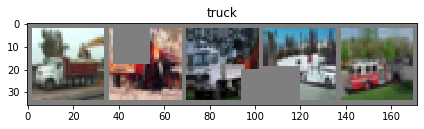

In [0]:
show_images.show_train_data(trainloader, classes)

## **Print Model Summary**

In [0]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = NewResnet().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

## **LR Range Test**

epoch = 1 Lr = 0.001  Loss=1.4526287317276 Batch_id=97 Accuracy=37.32: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]
epoch = 2 Lr = 0.0029  Loss=1.3118765354156494 Batch_id=97 Accuracy=43.85: 100%|██████████| 98/98 [00:20<00:00,  4.78it/s]
epoch = 3 Lr = 0.0048  Loss=1.2359724044799805 Batch_id=97 Accuracy=41.91: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]
epoch = 4 Lr = 0.006699999999999999  Loss=1.184178352355957 Batch_id=97 Accuracy=41.38: 100%|██████████| 98/98 [00:20<00:00,  4.78it/s]
epoch = 5 Lr = 0.0086  Loss=1.7545605897903442 Batch_id=97 Accuracy=22.86: 100%|██████████| 98/98 [00:20<00:00,  4.74it/s]
epoch = 6 Lr = 0.0105  Loss=1.7350661754608154 Batch_id=97 Accuracy=22.18: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]
epoch = 7 Lr = 0.012400000000000001  Loss=1.6674180030822754 Batch_id=97 Accuracy=22.89: 100%|██████████| 98/98 [00:20<00:00,  4.79it/s]
epoch = 8 Lr = 0.014300000000000002  Loss=1.774666428565979 Batch_id=97 Accuracy=20.84: 100%|██████████| 98/98 [00:2

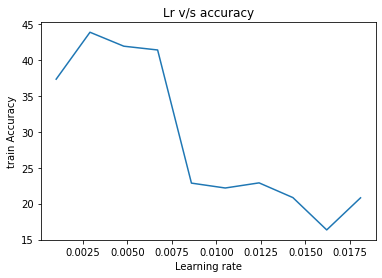

In [0]:
import torch.nn as nn
max_lr = 0.02
min_lr = 0.001
epoch = 10
criterion = nn.NLLLoss()
LR_test(max_lr, min_lr,device,epoch,model,criterion,trainloader,momemtum = 0.9,weight_decay=0.05, plot= True )


  

## **Initialise Loss funtion, Optimizer, Schedular**

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
model = NewResnet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay=0.005 ) 
criterion = nn.NLLLoss()
scheduler = OneCycleLR(optimizer, max_lr = 0.0125, total_steps=None, epochs=24, steps_per_epoch=len(trainloader), pct_start=0.167, anneal_strategy='linear', cycle_momentum=False, base_momentum=0.85, max_momentum=0.95, div_factor=10.0,final_div_factor =1)

## **Model Training**

In [0]:
train_test.train_model(model,device,trainloader,testloader,optimizer,criterion,24,scheduler,batch_scheduler=True,best_acc = 0,path = "/content/gdrive/My Drive/folder/bestmodel.pt") 


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.00125



Loss=3.2411694526672363 Batch_id=0 Accuracy=11.13:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=3.2411694526672363 Batch_id=0 Accuracy=11.13:   1%|          | 1/98 [00:01<01:38,  1.01s/it]
Loss=2.7592363357543945 Batch_id=1 Accuracy=9.86:   1%|          | 1/98 [00:01<01:38,  1.01s/it] 
Loss=2.7592363357543945 Batch_id=1 Accuracy=9.86:   2%|▏         | 2/98 [00:01<01:12,  1.32it/s]
Loss=2.45251202583313 Batch_id=2 Accuracy=10.81:   2%|▏         | 2/98 [00:01<01:12,  1.32it/s] 
Loss=2.45251202583313 Batch_id=2 Accuracy=10.81:   3%|▎         | 3/98 [00:01<00:54,  1.73it/s]
Loss=2.426947832107544 Batch_id=3 Accuracy=11.18:   3%|▎         | 3/98 [00:01<00:54,  1.73it/s]
Loss=2.426947832107544 Batch_id=3 Accuracy=11.18:   4%|▍         | 4/98 [00:01<00:42,  2.22it/s]
Loss=2.6736626625061035 Batch_id=4 Accuracy=11.41:   4%|▍         | 4/98 [00:01<00:42,  2.22it/s]
Loss=2.6736626625061035 Batch_id=4 Accuracy=11.41:   5%|▌         | 5/98 [00:01<00:38,  2.41it/s]
Loss=2.682138442993164 Batch_id=5


Test set: Average loss: 0.0026, Accuracy: 5399/10000 (53.99%)

accuracy increased, Saving model....
EPOCH: 2 LR: 0.004064050599309824



Loss=1.2430492639541626 Batch_id=0 Accuracy=55.86:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=1.2430492639541626 Batch_id=0 Accuracy=55.86:   1%|          | 1/98 [00:01<01:40,  1.03s/it]
Loss=1.3036377429962158 Batch_id=1 Accuracy=54.10:   1%|          | 1/98 [00:01<01:40,  1.03s/it]
Loss=1.3036377429962158 Batch_id=1 Accuracy=54.10:   2%|▏         | 2/98 [00:01<01:14,  1.30it/s]
Loss=1.3751425743103027 Batch_id=2 Accuracy=52.67:   2%|▏         | 2/98 [00:01<01:14,  1.30it/s]
Loss=1.3751425743103027 Batch_id=2 Accuracy=52.67:   3%|▎         | 3/98 [00:01<00:56,  1.70it/s]
Loss=1.274246335029602 Batch_id=3 Accuracy=52.98:   3%|▎         | 3/98 [00:01<00:56,  1.70it/s] 
Loss=1.274246335029602 Batch_id=3 Accuracy=52.98:   4%|▍         | 4/98 [00:01<00:43,  2.18it/s]
Loss=1.2388296127319336 Batch_id=4 Accuracy=53.95:   4%|▍         | 4/98 [00:01<00:43,  2.18it/s]
Loss=1.2388296127319336 Batch_id=4 Accuracy=53.95:   5%|▌         | 5/98 [00:01<00:42,  2.19it/s]
Loss=1.3228758573532104 Batc


Test set: Average loss: 0.0021, Accuracy: 6335/10000 (63.35%)

accuracy increased, Saving model....
EPOCH: 3 LR: 0.006878101198619647



Loss=1.0117214918136597 Batch_id=0 Accuracy=63.67:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=1.0117214918136597 Batch_id=0 Accuracy=63.67:   1%|          | 1/98 [00:01<01:45,  1.09s/it]
Loss=0.9984354376792908 Batch_id=1 Accuracy=62.60:   1%|          | 1/98 [00:01<01:45,  1.09s/it]
Loss=0.9984354376792908 Batch_id=1 Accuracy=62.60:   2%|▏         | 2/98 [00:01<01:17,  1.24it/s]
Loss=1.054847002029419 Batch_id=2 Accuracy=62.96:   2%|▏         | 2/98 [00:01<01:17,  1.24it/s] 
Loss=1.054847002029419 Batch_id=2 Accuracy=62.96:   3%|▎         | 3/98 [00:01<00:58,  1.63it/s]
Loss=1.0164158344268799 Batch_id=3 Accuracy=63.23:   3%|▎         | 3/98 [00:01<00:58,  1.63it/s]
Loss=1.0164158344268799 Batch_id=3 Accuracy=63.23:   4%|▍         | 4/98 [00:01<00:44,  2.10it/s]
Loss=1.0023436546325684 Batch_id=4 Accuracy=63.36:   4%|▍         | 4/98 [00:01<00:44,  2.10it/s]
Loss=1.0023436546325684 Batch_id=4 Accuracy=63.36:   5%|▌         | 5/98 [00:01<00:40,  2.29it/s]
Loss=1.062609314918518 Batch


Test set: Average loss: 0.0022, Accuracy: 6445/10000 (64.45%)

accuracy increased, Saving model....
EPOCH: 4 LR: 0.00969215179792947



Loss=0.8081482648849487 Batch_id=0 Accuracy=72.66:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.8081482648849487 Batch_id=0 Accuracy=72.66:   1%|          | 1/98 [00:01<01:46,  1.10s/it]
Loss=0.924751341342926 Batch_id=1 Accuracy=70.12:   1%|          | 1/98 [00:01<01:46,  1.10s/it] 
Loss=0.924751341342926 Batch_id=1 Accuracy=70.12:   2%|▏         | 2/98 [00:01<01:18,  1.22it/s]
Loss=0.8701918721199036 Batch_id=2 Accuracy=69.86:   2%|▏         | 2/98 [00:01<01:18,  1.22it/s]
Loss=0.8701918721199036 Batch_id=2 Accuracy=69.86:   3%|▎         | 3/98 [00:01<00:58,  1.62it/s]
Loss=0.856499433517456 Batch_id=3 Accuracy=69.43:   3%|▎         | 3/98 [00:01<00:58,  1.62it/s] 
Loss=0.856499433517456 Batch_id=3 Accuracy=69.43:   4%|▍         | 4/98 [00:01<00:45,  2.09it/s]
Loss=0.9781228303909302 Batch_id=4 Accuracy=68.59:   4%|▍         | 4/98 [00:01<00:45,  2.09it/s]
Loss=0.9781228303909302 Batch_id=4 Accuracy=68.59:   5%|▌         | 5/98 [00:01<00:41,  2.22it/s]
Loss=0.7306358218193054 Batch


Test set: Average loss: 0.0018, Accuracy: 7159/10000 (71.59%)

accuracy increased, Saving model....
EPOCH: 5 LR: 0.01249875970796482



Loss=0.892320454120636 Batch_id=0 Accuracy=69.14:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.892320454120636 Batch_id=0 Accuracy=69.14:   1%|          | 1/98 [00:00<01:34,  1.03it/s]
Loss=0.665249764919281 Batch_id=1 Accuracy=73.05:   1%|          | 1/98 [00:01<01:34,  1.03it/s]
Loss=0.665249764919281 Batch_id=1 Accuracy=73.05:   2%|▏         | 2/98 [00:01<01:10,  1.37it/s]
Loss=0.7357001304626465 Batch_id=2 Accuracy=72.66:   2%|▏         | 2/98 [00:01<01:10,  1.37it/s]
Loss=0.7357001304626465 Batch_id=2 Accuracy=72.66:   3%|▎         | 3/98 [00:01<00:52,  1.81it/s]
Loss=0.8562396168708801 Batch_id=3 Accuracy=72.07:   3%|▎         | 3/98 [00:01<00:52,  1.81it/s]
Loss=0.8562396168708801 Batch_id=3 Accuracy=72.07:   4%|▍         | 4/98 [00:01<00:40,  2.30it/s]
Loss=0.692050039768219 Batch_id=4 Accuracy=72.70:   4%|▍         | 4/98 [00:01<00:40,  2.30it/s] 
Loss=0.692050039768219 Batch_id=4 Accuracy=72.70:   5%|▌         | 5/98 [00:01<00:41,  2.25it/s]
Loss=0.8387119770050049 Batch_id


Test set: Average loss: 0.0014, Accuracy: 7664/10000 (76.64%)

accuracy increased, Saving model....
EPOCH: 6 LR: 0.011936034617928805



Loss=0.6109877228736877 Batch_id=0 Accuracy=79.88:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.6109877228736877 Batch_id=0 Accuracy=79.88:   1%|          | 1/98 [00:00<01:26,  1.12it/s]
Loss=0.6725523471832275 Batch_id=1 Accuracy=78.03:   1%|          | 1/98 [00:01<01:26,  1.12it/s]
Loss=0.6725523471832275 Batch_id=1 Accuracy=78.03:   2%|▏         | 2/98 [00:01<01:09,  1.39it/s]
Loss=0.7924720048904419 Batch_id=2 Accuracy=76.24:   2%|▏         | 2/98 [00:01<01:09,  1.39it/s]
Loss=0.7924720048904419 Batch_id=2 Accuracy=76.24:   3%|▎         | 3/98 [00:01<00:52,  1.81it/s]
Loss=0.7184078693389893 Batch_id=3 Accuracy=76.03:   3%|▎         | 3/98 [00:01<00:52,  1.81it/s]
Loss=0.7184078693389893 Batch_id=3 Accuracy=76.03:   4%|▍         | 4/98 [00:01<00:40,  2.31it/s]
Loss=0.6542595624923706 Batch_id=4 Accuracy=76.60:   4%|▍         | 4/98 [00:01<00:40,  2.31it/s]
Loss=0.6542595624923706 Batch_id=4 Accuracy=76.60:   5%|▌         | 5/98 [00:01<00:37,  2.46it/s]
Loss=0.631629228591919 Batc


Test set: Average loss: 0.0012, Accuracy: 7964/10000 (79.64%)

accuracy increased, Saving model....
EPOCH: 7 LR: 0.01137330952789279



Loss=0.6449178457260132 Batch_id=0 Accuracy=78.91:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.6449178457260132 Batch_id=0 Accuracy=78.91:   1%|          | 1/98 [00:00<01:31,  1.06it/s]
Loss=0.6163815259933472 Batch_id=1 Accuracy=79.20:   1%|          | 1/98 [00:01<01:31,  1.06it/s]
Loss=0.6163815259933472 Batch_id=1 Accuracy=79.20:   2%|▏         | 2/98 [00:01<01:10,  1.37it/s]
Loss=0.6048915982246399 Batch_id=2 Accuracy=79.04:   2%|▏         | 2/98 [00:01<01:10,  1.37it/s]
Loss=0.6048915982246399 Batch_id=2 Accuracy=79.04:   3%|▎         | 3/98 [00:01<00:53,  1.79it/s]
Loss=0.5254712700843811 Batch_id=3 Accuracy=79.35:   3%|▎         | 3/98 [00:01<00:53,  1.79it/s]
Loss=0.5254712700843811 Batch_id=3 Accuracy=79.35:   4%|▍         | 4/98 [00:01<00:41,  2.25it/s]
Loss=0.5742403864860535 Batch_id=4 Accuracy=79.69:   4%|▍         | 4/98 [00:01<00:41,  2.25it/s]
Loss=0.5742403864860535 Batch_id=4 Accuracy=79.69:   5%|▌         | 5/98 [00:01<00:41,  2.26it/s]
Loss=0.6230103373527527 Bat


Test set: Average loss: 0.0010, Accuracy: 8270/10000 (82.70%)

accuracy increased, Saving model....
EPOCH: 8 LR: 0.010810584437856777



Loss=0.4607507586479187 Batch_id=0 Accuracy=82.23:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.4607507586479187 Batch_id=0 Accuracy=82.23:   1%|          | 1/98 [00:01<01:40,  1.04s/it]
Loss=0.4720189869403839 Batch_id=1 Accuracy=83.69:   1%|          | 1/98 [00:01<01:40,  1.04s/it]
Loss=0.4720189869403839 Batch_id=1 Accuracy=83.69:   2%|▏         | 2/98 [00:01<01:14,  1.29it/s]
Loss=0.4750802218914032 Batch_id=2 Accuracy=83.40:   2%|▏         | 2/98 [00:01<01:14,  1.29it/s]
Loss=0.4750802218914032 Batch_id=2 Accuracy=83.40:   3%|▎         | 3/98 [00:01<00:56,  1.70it/s]
Loss=0.4953951835632324 Batch_id=3 Accuracy=83.25:   3%|▎         | 3/98 [00:01<00:56,  1.70it/s]
Loss=0.4953951835632324 Batch_id=3 Accuracy=83.25:   4%|▍         | 4/98 [00:01<00:43,  2.16it/s]
Loss=0.3983047902584076 Batch_id=4 Accuracy=83.83:   4%|▍         | 4/98 [00:01<00:43,  2.16it/s]
Loss=0.3983047902584076 Batch_id=4 Accuracy=83.83:   5%|▌         | 5/98 [00:01<00:40,  2.28it/s]
Loss=0.3990544378757477 Bat


Test set: Average loss: 0.0009, Accuracy: 8385/10000 (83.85%)

accuracy increased, Saving model....



  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 9 LR: 0.010247859347820762



Loss=0.40504390001296997 Batch_id=0 Accuracy=88.67:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.40504390001296997 Batch_id=0 Accuracy=88.67:   1%|          | 1/98 [00:01<01:44,  1.08s/it]
Loss=0.4241198003292084 Batch_id=1 Accuracy=87.30:   1%|          | 1/98 [00:01<01:44,  1.08s/it] 
Loss=0.4241198003292084 Batch_id=1 Accuracy=87.30:   2%|▏         | 2/98 [00:01<01:17,  1.24it/s]
Loss=0.3883824348449707 Batch_id=2 Accuracy=87.17:   2%|▏         | 2/98 [00:01<01:17,  1.24it/s]
Loss=0.3883824348449707 Batch_id=2 Accuracy=87.17:   3%|▎         | 3/98 [00:01<00:57,  1.64it/s]
Loss=0.4248563349246979 Batch_id=3 Accuracy=86.62:   3%|▎         | 3/98 [00:01<00:57,  1.64it/s]
Loss=0.4248563349246979 Batch_id=3 Accuracy=86.62:   4%|▍         | 4/98 [00:01<00:44,  2.12it/s]
Loss=0.4313308000564575 Batch_id=4 Accuracy=86.48:   4%|▍         | 4/98 [00:01<00:44,  2.12it/s]
Loss=0.4313308000564575 Batch_id=4 Accuracy=86.48:   5%|▌         | 5/98 [00:01<00:41,  2.26it/s]
Loss=0.3956623375415802 


Test set: Average loss: 0.0009, Accuracy: 8501/10000 (85.01%)

accuracy increased, Saving model....
EPOCH: 10 LR: 0.009685134257784746



Loss=0.4125250577926636 Batch_id=0 Accuracy=84.96:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.4125250577926636 Batch_id=0 Accuracy=84.96:   1%|          | 1/98 [00:00<01:26,  1.13it/s]
Loss=0.34644970297813416 Batch_id=1 Accuracy=86.23:   1%|          | 1/98 [00:01<01:26,  1.13it/s]
Loss=0.34644970297813416 Batch_id=1 Accuracy=86.23:   2%|▏         | 2/98 [00:01<01:08,  1.40it/s]
Loss=0.37969595193862915 Batch_id=2 Accuracy=86.07:   2%|▏         | 2/98 [00:01<01:08,  1.40it/s]
Loss=0.37969595193862915 Batch_id=2 Accuracy=86.07:   3%|▎         | 3/98 [00:01<00:51,  1.83it/s]
Loss=0.38325855135917664 Batch_id=3 Accuracy=86.13:   3%|▎         | 3/98 [00:01<00:51,  1.83it/s]
Loss=0.38325855135917664 Batch_id=3 Accuracy=86.13:   4%|▍         | 4/98 [00:01<00:40,  2.34it/s]
Loss=0.3792739808559418 Batch_id=4 Accuracy=85.98:   4%|▍         | 4/98 [00:01<00:40,  2.34it/s] 
Loss=0.3792739808559418 Batch_id=4 Accuracy=85.98:   5%|▌         | 5/98 [00:01<00:36,  2.58it/s]
Loss=0.3807479739189


Test set: Average loss: 0.0008, Accuracy: 8626/10000 (86.26%)

accuracy increased, Saving model....
EPOCH: 11 LR: 0.009122409167748733



Loss=0.4033700227737427 Batch_id=0 Accuracy=85.16:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.4033700227737427 Batch_id=0 Accuracy=85.16:   1%|          | 1/98 [00:01<01:45,  1.08s/it]
Loss=0.39290860295295715 Batch_id=1 Accuracy=85.55:   1%|          | 1/98 [00:01<01:45,  1.08s/it]
Loss=0.39290860295295715 Batch_id=1 Accuracy=85.55:   2%|▏         | 2/98 [00:01<01:17,  1.24it/s]
Loss=0.3661852777004242 Batch_id=2 Accuracy=86.52:   2%|▏         | 2/98 [00:01<01:17,  1.24it/s] 
Loss=0.3661852777004242 Batch_id=2 Accuracy=86.52:   3%|▎         | 3/98 [00:01<00:58,  1.63it/s]
Loss=0.39579352736473083 Batch_id=3 Accuracy=86.82:   3%|▎         | 3/98 [00:01<00:58,  1.63it/s]
Loss=0.39579352736473083 Batch_id=3 Accuracy=86.82:   4%|▍         | 4/98 [00:01<00:44,  2.11it/s]
Loss=0.3741992712020874 Batch_id=4 Accuracy=86.91:   4%|▍         | 4/98 [00:01<00:44,  2.11it/s] 
Loss=0.3741992712020874 Batch_id=4 Accuracy=86.91:   5%|▌         | 5/98 [00:01<00:42,  2.20it/s]
Loss=0.39196693897247


Test set: Average loss: 0.0008, Accuracy: 8666/10000 (86.66%)

accuracy increased, Saving model....
EPOCH: 12 LR: 0.00855968407771272



Loss=0.3128947615623474 Batch_id=0 Accuracy=88.67:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.3128947615623474 Batch_id=0 Accuracy=88.67:   1%|          | 1/98 [00:01<01:46,  1.10s/it]
Loss=0.3260805606842041 Batch_id=1 Accuracy=88.67:   1%|          | 1/98 [00:01<01:46,  1.10s/it]
Loss=0.3260805606842041 Batch_id=1 Accuracy=88.67:   2%|▏         | 2/98 [00:01<01:18,  1.22it/s]
Loss=0.31691452860832214 Batch_id=2 Accuracy=88.48:   2%|▏         | 2/98 [00:01<01:18,  1.22it/s]
Loss=0.31691452860832214 Batch_id=2 Accuracy=88.48:   3%|▎         | 3/98 [00:01<00:59,  1.61it/s]
Loss=0.32144954800605774 Batch_id=3 Accuracy=88.23:   3%|▎         | 3/98 [00:01<00:59,  1.61it/s]
Loss=0.32144954800605774 Batch_id=3 Accuracy=88.23:   4%|▍         | 4/98 [00:01<00:45,  2.08it/s]
Loss=0.44092023372650146 Batch_id=4 Accuracy=87.11:   4%|▍         | 4/98 [00:01<00:45,  2.08it/s]
Loss=0.44092023372650146 Batch_id=4 Accuracy=87.11:   5%|▌         | 5/98 [00:01<00:40,  2.32it/s]
Loss=0.38500988483428


Test set: Average loss: 0.0007, Accuracy: 8725/10000 (87.25%)

accuracy increased, Saving model....
EPOCH: 13 LR: 0.007996958987676703



Loss=0.31283262372016907 Batch_id=0 Accuracy=88.87:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.31283262372016907 Batch_id=0 Accuracy=88.87:   1%|          | 1/98 [00:01<01:43,  1.07s/it]
Loss=0.31979626417160034 Batch_id=1 Accuracy=89.36:   1%|          | 1/98 [00:01<01:43,  1.07s/it]
Loss=0.31979626417160034 Batch_id=1 Accuracy=89.36:   2%|▏         | 2/98 [00:01<01:16,  1.26it/s]
Loss=0.32268375158309937 Batch_id=2 Accuracy=89.65:   2%|▏         | 2/98 [00:01<01:16,  1.26it/s]
Loss=0.32268375158309937 Batch_id=2 Accuracy=89.65:   3%|▎         | 3/98 [00:01<00:57,  1.65it/s]
Loss=0.30896344780921936 Batch_id=3 Accuracy=89.21:   3%|▎         | 3/98 [00:01<00:57,  1.65it/s]
Loss=0.30896344780921936 Batch_id=3 Accuracy=89.21:   4%|▍         | 4/98 [00:01<00:44,  2.13it/s]
Loss=0.32648900151252747 Batch_id=4 Accuracy=89.22:   4%|▍         | 4/98 [00:02<00:44,  2.13it/s]
Loss=0.32648900151252747 Batch_id=4 Accuracy=89.22:   5%|▌         | 5/98 [00:02<00:43,  2.12it/s]
Loss=0.2725997865


Test set: Average loss: 0.0007, Accuracy: 8744/10000 (87.44%)

accuracy increased, Saving model....
EPOCH: 14 LR: 0.007434233897640689


  0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.31667354702949524 Batch_id=0 Accuracy=88.87:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.31667354702949524 Batch_id=0 Accuracy=88.87:   1%|          | 1/98 [00:01<01:47,  1.11s/it]
Loss=0.33882954716682434 Batch_id=1 Accuracy=88.38:   1%|          | 1/98 [00:01<01:47,  1.11s/it]
Loss=0.33882954716682434 Batch_id=1 Accuracy=88.38:   2%|▏         | 2/98 [00:01<01:18,  1.22it/s]
Loss=0.28615128993988037 Batch_id=2 Accuracy=89.06:   2%|▏         | 2/98 [00:01<01:18,  1.22it/s]
Loss=0.28615128993988037 Batch_id=2 Accuracy=89.06:   3%|▎         | 3/98 [00:01<00:58,  1.61it/s]
Loss=0.28302329778671265 Batch_id=3 Accuracy=89.21:   3%|▎         | 3/98 [00:01<00:58,  1.61it/s]
Loss=0.28302329778671265 Batch_id=3 Accuracy=89.21:   4%|▍         | 4/98 [00:01<00:45,  2.08it/s]
Loss=0.2696521580219269 Batch_id=4 Accuracy=89.61:   4%|▍         | 4/98 [00:02<00:45,  2.08it/s] 
Loss=0.2696521580219269 Batch_id=4 Accuracy=89.61:   5%|▌         | 5/98 [00:0


Test set: Average loss: 0.0007, Accuracy: 8801/10000 (88.01%)

accuracy increased, Saving model....
EPOCH: 15 LR: 0.006871508807604675



Loss=0.3022783100605011 Batch_id=0 Accuracy=89.45:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.3022783100605011 Batch_id=0 Accuracy=89.45:   1%|          | 1/98 [00:01<01:53,  1.17s/it]
Loss=0.2482641488313675 Batch_id=1 Accuracy=90.82:   1%|          | 1/98 [00:01<01:53,  1.17s/it]
Loss=0.2482641488313675 Batch_id=1 Accuracy=90.82:   2%|▏         | 2/98 [00:01<01:23,  1.15it/s]
Loss=0.2592391073703766 Batch_id=2 Accuracy=91.08:   2%|▏         | 2/98 [00:01<01:23,  1.15it/s]
Loss=0.2592391073703766 Batch_id=2 Accuracy=91.08:   3%|▎         | 3/98 [00:01<01:02,  1.52it/s]
Loss=0.2867971658706665 Batch_id=3 Accuracy=90.53:   3%|▎         | 3/98 [00:01<01:02,  1.52it/s]
Loss=0.2867971658706665 Batch_id=3 Accuracy=90.53:   4%|▍         | 4/98 [00:01<00:47,  1.97it/s]
Loss=0.29482147097587585 Batch_id=4 Accuracy=90.59:   4%|▍         | 4/98 [00:01<00:47,  1.97it/s]
Loss=0.29482147097587585 Batch_id=4 Accuracy=90.59:   5%|▌         | 5/98 [00:01<00:42,  2.21it/s]
Loss=0.22434978187084198 


Test set: Average loss: 0.0008, Accuracy: 8697/10000 (86.97%)

EPOCH: 16 LR: 0.006308783717568661



Loss=0.3018818199634552 Batch_id=0 Accuracy=89.45:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.3018818199634552 Batch_id=0 Accuracy=89.45:   1%|          | 1/98 [00:01<01:40,  1.04s/it]
Loss=0.2258702963590622 Batch_id=1 Accuracy=90.72:   1%|          | 1/98 [00:01<01:40,  1.04s/it]
Loss=0.2258702963590622 Batch_id=1 Accuracy=90.72:   2%|▏         | 2/98 [00:01<01:14,  1.29it/s]
Loss=0.2239629626274109 Batch_id=2 Accuracy=91.47:   2%|▏         | 2/98 [00:01<01:14,  1.29it/s]
Loss=0.2239629626274109 Batch_id=2 Accuracy=91.47:   3%|▎         | 3/98 [00:01<00:55,  1.70it/s]
Loss=0.2846728563308716 Batch_id=3 Accuracy=91.06:   3%|▎         | 3/98 [00:01<00:55,  1.70it/s]
Loss=0.2846728563308716 Batch_id=3 Accuracy=91.06:   4%|▍         | 4/98 [00:01<00:43,  2.19it/s]
Loss=0.28224650025367737 Batch_id=4 Accuracy=90.94:   4%|▍         | 4/98 [00:01<00:43,  2.19it/s]
Loss=0.28224650025367737 Batch_id=4 Accuracy=90.94:   5%|▌         | 5/98 [00:01<00:40,  2.30it/s]
Loss=0.2730580270290375 B


Test set: Average loss: 0.0007, Accuracy: 8836/10000 (88.36%)

accuracy increased, Saving model....
EPOCH: 17 LR: 0.005746058627532647



Loss=0.23198290169239044 Batch_id=0 Accuracy=92.38:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.23198290169239044 Batch_id=0 Accuracy=92.38:   1%|          | 1/98 [00:00<01:35,  1.01it/s]
Loss=0.22714275121688843 Batch_id=1 Accuracy=92.29:   1%|          | 1/98 [00:01<01:35,  1.01it/s]
Loss=0.22714275121688843 Batch_id=1 Accuracy=92.29:   2%|▏         | 2/98 [00:01<01:10,  1.35it/s]
Loss=0.2649771571159363 Batch_id=2 Accuracy=91.60:   2%|▏         | 2/98 [00:01<01:10,  1.35it/s] 
Loss=0.2649771571159363 Batch_id=2 Accuracy=91.60:   3%|▎         | 3/98 [00:01<00:53,  1.77it/s]
Loss=0.2764413356781006 Batch_id=3 Accuracy=91.36:   3%|▎         | 3/98 [00:01<00:53,  1.77it/s]
Loss=0.2764413356781006 Batch_id=3 Accuracy=91.36:   4%|▍         | 4/98 [00:01<00:41,  2.26it/s]
Loss=0.25013649463653564 Batch_id=4 Accuracy=91.41:   4%|▍         | 4/98 [00:01<00:41,  2.26it/s]
Loss=0.25013649463653564 Batch_id=4 Accuracy=91.41:   5%|▌         | 5/98 [00:01<00:38,  2.40it/s]
Loss=0.2558887600898


Test set: Average loss: 0.0006, Accuracy: 8945/10000 (89.45%)

accuracy increased, Saving model....
EPOCH: 18 LR: 0.0051833335374966314



Loss=0.21363507211208344 Batch_id=0 Accuracy=92.77:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.21363507211208344 Batch_id=0 Accuracy=92.77:   1%|          | 1/98 [00:01<01:43,  1.06s/it]
Loss=0.22704316675662994 Batch_id=1 Accuracy=92.58:   1%|          | 1/98 [00:01<01:43,  1.06s/it]
Loss=0.22704316675662994 Batch_id=1 Accuracy=92.58:   2%|▏         | 2/98 [00:01<01:16,  1.26it/s]
Loss=0.2410224974155426 Batch_id=2 Accuracy=92.38:   2%|▏         | 2/98 [00:01<01:16,  1.26it/s] 
Loss=0.2410224974155426 Batch_id=2 Accuracy=92.38:   3%|▎         | 3/98 [00:01<00:57,  1.66it/s]
Loss=0.21144132316112518 Batch_id=3 Accuracy=92.53:   3%|▎         | 3/98 [00:01<00:57,  1.66it/s]
Loss=0.21144132316112518 Batch_id=3 Accuracy=92.53:   4%|▍         | 4/98 [00:01<00:43,  2.14it/s]
Loss=0.22072350978851318 Batch_id=4 Accuracy=92.50:   4%|▍         | 4/98 [00:01<00:43,  2.14it/s]
Loss=0.22072350978851318 Batch_id=4 Accuracy=92.50:   5%|▌         | 5/98 [00:02<00:43,  2.14it/s]
Loss=0.21579611301


Test set: Average loss: 0.0006, Accuracy: 8955/10000 (89.55%)

accuracy increased, Saving model....
EPOCH: 19 LR: 0.004620608447460617



Loss=0.22370153665542603 Batch_id=0 Accuracy=92.97:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.22370153665542603 Batch_id=0 Accuracy=92.97:   1%|          | 1/98 [00:01<01:45,  1.09s/it]
Loss=0.21336665749549866 Batch_id=1 Accuracy=92.38:   1%|          | 1/98 [00:01<01:45,  1.09s/it]
Loss=0.21336665749549866 Batch_id=1 Accuracy=92.38:   2%|▏         | 2/98 [00:01<01:17,  1.24it/s]
Loss=0.2146027833223343 Batch_id=2 Accuracy=92.25:   2%|▏         | 2/98 [00:01<01:17,  1.24it/s] 
Loss=0.2146027833223343 Batch_id=2 Accuracy=92.25:   3%|▎         | 3/98 [00:01<00:58,  1.64it/s]
Loss=0.20661024749279022 Batch_id=3 Accuracy=92.29:   3%|▎         | 3/98 [00:01<00:58,  1.64it/s]
Loss=0.20661024749279022 Batch_id=3 Accuracy=92.29:   4%|▍         | 4/98 [00:01<00:44,  2.11it/s]
Loss=0.22648528218269348 Batch_id=4 Accuracy=92.15:   4%|▍         | 4/98 [00:02<00:44,  2.11it/s]
Loss=0.22648528218269348 Batch_id=4 Accuracy=92.15:   5%|▌         | 5/98 [00:02<00:44,  2.10it/s]
Loss=0.17859645187


Test set: Average loss: 0.0006, Accuracy: 8967/10000 (89.67%)

accuracy increased, Saving model....
EPOCH: 20 LR: 0.004057883357424602



Loss=0.19619594514369965 Batch_id=0 Accuracy=93.16:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.19619594514369965 Batch_id=0 Accuracy=93.16:   1%|          | 1/98 [00:01<01:48,  1.12s/it]
Loss=0.20137463510036469 Batch_id=1 Accuracy=93.16:   1%|          | 1/98 [00:01<01:48,  1.12s/it]
Loss=0.20137463510036469 Batch_id=1 Accuracy=93.16:   2%|▏         | 2/98 [00:01<01:20,  1.20it/s]
Loss=0.18946951627731323 Batch_id=2 Accuracy=93.49:   2%|▏         | 2/98 [00:01<01:20,  1.20it/s]
Loss=0.18946951627731323 Batch_id=2 Accuracy=93.49:   3%|▎         | 3/98 [00:01<01:00,  1.58it/s]
Loss=0.14676976203918457 Batch_id=3 Accuracy=94.09:   3%|▎         | 3/98 [00:01<01:00,  1.58it/s]
Loss=0.14676976203918457 Batch_id=3 Accuracy=94.09:   4%|▍         | 4/98 [00:01<00:46,  2.03it/s]
Loss=0.19077761471271515 Batch_id=4 Accuracy=94.02:   4%|▍         | 4/98 [00:01<00:46,  2.03it/s]
Loss=0.19077761471271515 Batch_id=4 Accuracy=94.02:   5%|▌         | 5/98 [00:01<00:42,  2.19it/s]
Loss=0.1748161613


Test set: Average loss: 0.0005, Accuracy: 9079/10000 (90.79%)

accuracy increased, Saving model....
EPOCH: 21 LR: 0.003495158267388587



Loss=0.14699801802635193 Batch_id=0 Accuracy=95.70:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.14699801802635193 Batch_id=0 Accuracy=95.70:   1%|          | 1/98 [00:01<01:41,  1.05s/it]
Loss=0.1487245261669159 Batch_id=1 Accuracy=95.90:   1%|          | 1/98 [00:01<01:41,  1.05s/it] 
Loss=0.1487245261669159 Batch_id=1 Accuracy=95.90:   2%|▏         | 2/98 [00:01<01:15,  1.28it/s]
Loss=0.17300069332122803 Batch_id=2 Accuracy=95.38:   2%|▏         | 2/98 [00:01<01:15,  1.28it/s]
Loss=0.17300069332122803 Batch_id=2 Accuracy=95.38:   3%|▎         | 3/98 [00:01<00:56,  1.68it/s]
Loss=0.19450314342975616 Batch_id=3 Accuracy=94.78:   3%|▎         | 3/98 [00:01<00:56,  1.68it/s]
Loss=0.19450314342975616 Batch_id=3 Accuracy=94.78:   4%|▍         | 4/98 [00:01<00:43,  2.16it/s]
Loss=0.17312252521514893 Batch_id=4 Accuracy=94.73:   4%|▍         | 4/98 [00:01<00:43,  2.16it/s]
Loss=0.17312252521514893 Batch_id=4 Accuracy=94.73:   5%|▌         | 5/98 [00:01<00:41,  2.23it/s]
Loss=0.17996327579


Test set: Average loss: 0.0006, Accuracy: 9078/10000 (90.78%)

EPOCH: 22 LR: 0.0029324331773525735



Loss=0.15053074061870575 Batch_id=0 Accuracy=94.92:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.15053074061870575 Batch_id=0 Accuracy=94.92:   1%|          | 1/98 [00:00<01:32,  1.05it/s]
Loss=0.1583922654390335 Batch_id=1 Accuracy=94.63:   1%|          | 1/98 [00:01<01:32,  1.05it/s] 
Loss=0.1583922654390335 Batch_id=1 Accuracy=94.63:   2%|▏         | 2/98 [00:01<01:08,  1.40it/s]
Loss=0.15750592947006226 Batch_id=2 Accuracy=94.73:   2%|▏         | 2/98 [00:01<01:08,  1.40it/s]
Loss=0.15750592947006226 Batch_id=2 Accuracy=94.73:   3%|▎         | 3/98 [00:01<00:52,  1.82it/s]
Loss=0.217744380235672 Batch_id=3 Accuracy=94.34:   3%|▎         | 3/98 [00:01<00:52,  1.82it/s]  
Loss=0.217744380235672 Batch_id=3 Accuracy=94.34:   4%|▍         | 4/98 [00:01<00:40,  2.33it/s]
Loss=0.14851456880569458 Batch_id=4 Accuracy=94.41:   4%|▍         | 4/98 [00:01<00:40,  2.33it/s]
Loss=0.14851456880569458 Batch_id=4 Accuracy=94.41:   5%|▌         | 5/98 [00:01<00:38,  2.44it/s]
Loss=0.1222431808710


Test set: Average loss: 0.0005, Accuracy: 9127/10000 (91.27%)

accuracy increased, Saving model....
EPOCH: 23 LR: 0.0023697080873165584



Loss=0.15529166162014008 Batch_id=0 Accuracy=94.53:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.15529166162014008 Batch_id=0 Accuracy=94.53:   1%|          | 1/98 [00:01<01:42,  1.06s/it]
Loss=0.1335761994123459 Batch_id=1 Accuracy=95.31:   1%|          | 1/98 [00:01<01:42,  1.06s/it] 
Loss=0.1335761994123459 Batch_id=1 Accuracy=95.31:   2%|▏         | 2/98 [00:01<01:15,  1.27it/s]
Loss=0.15417316555976868 Batch_id=2 Accuracy=95.18:   2%|▏         | 2/98 [00:01<01:15,  1.27it/s]
Loss=0.15417316555976868 Batch_id=2 Accuracy=95.18:   3%|▎         | 3/98 [00:01<00:56,  1.67it/s]
Loss=0.13088908791542053 Batch_id=3 Accuracy=95.46:   3%|▎         | 3/98 [00:01<00:56,  1.67it/s]
Loss=0.13088908791542053 Batch_id=3 Accuracy=95.46:   4%|▍         | 4/98 [00:01<00:43,  2.14it/s]
Loss=0.1537064015865326 Batch_id=4 Accuracy=95.55:   4%|▍         | 4/98 [00:01<00:43,  2.14it/s] 
Loss=0.1537064015865326 Batch_id=4 Accuracy=95.55:   5%|▌         | 5/98 [00:01<00:39,  2.38it/s]
Loss=0.154746726155


Test set: Average loss: 0.0005, Accuracy: 9138/10000 (91.38%)

accuracy increased, Saving model....
EPOCH: 24 LR: 0.0018069829972805432



Loss=0.10843561589717865 Batch_id=0 Accuracy=97.66:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.10843561589717865 Batch_id=0 Accuracy=97.66:   1%|          | 1/98 [00:01<01:48,  1.12s/it]
Loss=0.13967379927635193 Batch_id=1 Accuracy=96.48:   1%|          | 1/98 [00:01<01:48,  1.12s/it]
Loss=0.13967379927635193 Batch_id=1 Accuracy=96.48:   2%|▏         | 2/98 [00:01<01:19,  1.21it/s]
Loss=0.13365106284618378 Batch_id=2 Accuracy=96.35:   2%|▏         | 2/98 [00:01<01:19,  1.21it/s]
Loss=0.13365106284618378 Batch_id=2 Accuracy=96.35:   3%|▎         | 3/98 [00:01<00:59,  1.60it/s]
Loss=0.13119953870773315 Batch_id=3 Accuracy=96.29:   3%|▎         | 3/98 [00:01<00:59,  1.60it/s]
Loss=0.13119953870773315 Batch_id=3 Accuracy=96.29:   4%|▍         | 4/98 [00:01<00:45,  2.06it/s]
Loss=0.15118366479873657 Batch_id=4 Accuracy=96.17:   4%|▍         | 4/98 [00:02<00:45,  2.06it/s]
Loss=0.15118366479873657 Batch_id=4 Accuracy=96.17:   5%|▌         | 5/98 [00:02<00:46,  2.00it/s]
Loss=0.1336583793


Test set: Average loss: 0.0005, Accuracy: 9195/10000 (91.95%)

accuracy increased, Saving model....


## **Load the Best Accuracy Model**

In [0]:

model = NewResnet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9 ,weight_decay = 0.0005)
checkpoint = torch.load("/content/gdrive/My Drive/folder/bestmodel.pt")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

model.eval()

NewResnet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (x1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (R1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(128, 256, k

In [0]:
evaluate.evaluate_accuracy(model,device,testloader)

Accuracy of the network on the 10000 test images: 91.95 %


## **class wise accuracy**

In [0]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 91 %
Accuracy of   car : 96 %
Accuracy of  bird : 89 %
Accuracy of   cat : 80 %
Accuracy of  deer : 93 %
Accuracy of   dog : 85 %
Accuracy of  frog : 94 %
Accuracy of horse : 95 %
Accuracy of  ship : 94 %
Accuracy of truck : 96 %


## **Plot accurary change in test and train**

KeyError: ignored

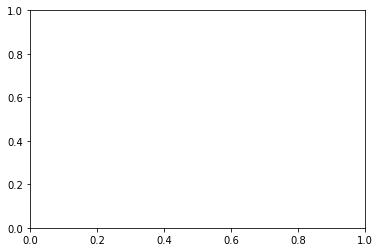

In [0]:
import numpy as np
curves = [{"x":np.arange(1,25), "y": train_test.LR, "label": "","xlabel": "Epoch", "ylabel":"Learning Rate"}]
evaluate.plot_curve(curves,"Learning rate w.r.t Epochs",Figsize = (6,4))


## **Extract 25 misclassified_images**

KeyError: ignored

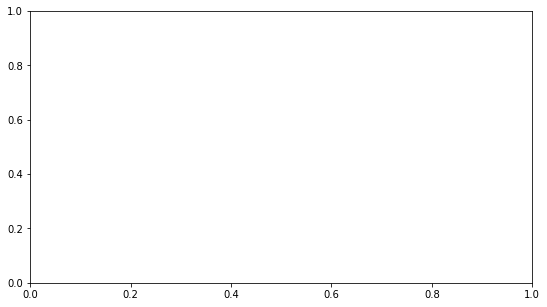

In [0]:
curves = [{"y":train_test.test_acc , "label": "Validation Accuracy","xlabel": "Epoch", "ylabel":"Accuracy" },{"y":train_test.train_acc , "label": "Train Accuracy","xlabel": "Epoch", "ylabel":"Accuracy" }]
evaluate.plot_curve(curves,"Accuracy Change",Figsize = (9,5))


## **GradCam on misclassified images**

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


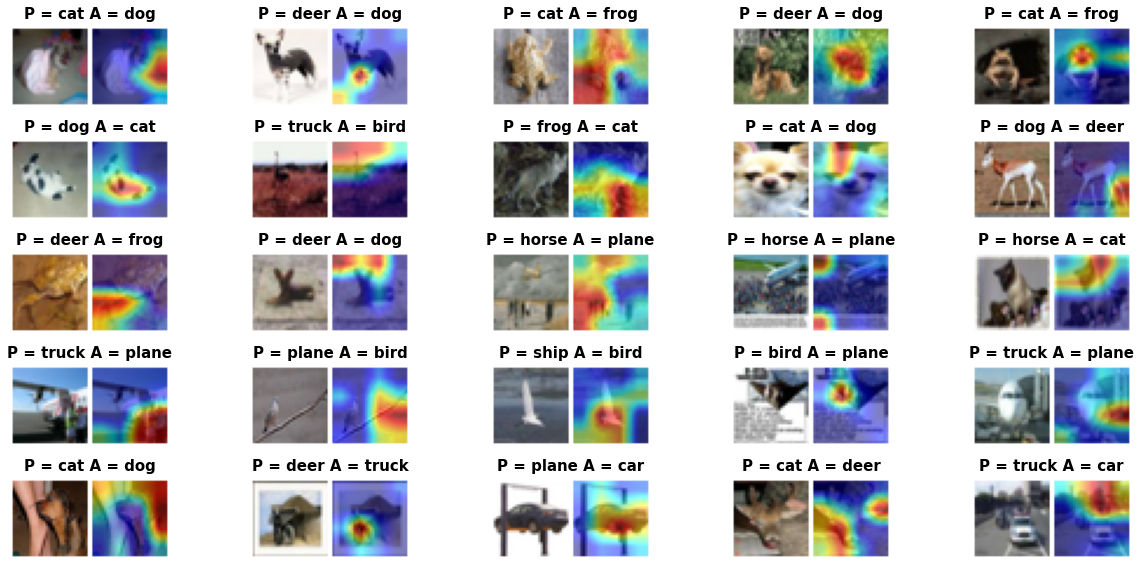

In [0]:

from GradCam import GradCamView
layers = [model.R2]
miscalssified_images = evaluate.show_misclassified_images(model, device, testloader, classes)
GradCamView(miscalssified_images,model,classes,layers,Figsize = (17,8),subplotx1 = 5, subplotx2 = 5)
